In [33]:
import pandas as pd
df = pd.read_csv(r"F:\Machine Learning\Project-02\Data\air_quality_data.csv")
df.head()


,PM2.5,PM10,NO2,CO,Temperature,Humidity,AQI,Safe
0,74.908024,55.539879,26.170568,6.727030,18.599794,39.363552,194.477086,0
1,190.142861,162.570284,24.697880,7.966814,30.271616,47.343566,51.715909,1
2,146.398788,261.883751,90.625458,2.504679,28.008046,85.454739,261.718369,0
3,119.731697,219.667466,24.954620,6.248741,-2.305005,34.000439,183.934872,0
4,31.203728,241.968344,27.194973,5.717460,-2.537527,86.964968,47.161165,1


In [34]:
# 1st checking null 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PM2.5        1000 non-null   float64
 1   PM10         1000 non-null   float64
 2   NO2          1000 non-null   float64
 3   CO           1000 non-null   float64
 4   Temperature  1000 non-null   float64
 5   Humidity     1000 non-null   float64
 6   AQI          1000 non-null   float64
 7   Safe         1000 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 62.6 KB


In [35]:
df.describe()

,PM2.5,PM10,NO2,CO,Temperature,Humidity,AQI,Safe
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,98.051311,152.105192,50.240573,4.903750,14.705266,49.846449,147.992652,0.342000
std,58.427472,87.656968,29.067420,2.864893,14.340497,28.919481,86.920092,0.474617
min,0.926405,0.965479,0.001163,0.006534,-9.998464,0.618382,0.428503,0.000000
25%,47.194654,72.322281,26.135098,2.419008,2.248700,24.938000,72.066499,0.000000
50%,99.361475,155.620172,50.061392,4.842793,14.729905,49.040282,145.392907,0.000000
75%,148.863918,228.139517,75.910353,7.375408,26.999673,73.985178,226.939304,1.000000
max,199.943535,299.824118,99.782086,9.995577,39.887469,99.935030,299.838204,1.000000


In [36]:
X = df[['PM2.5' , 'PM10' , 'NO2' , 'CO' , 'Temperature', 'Humidity' ]]
y_reg = df['AQI']
y_class = df['Safe']


In [37]:
#HANDLING MISSING VALUES
X = X.fillna(X.mean())

"""Standardization"""
from sklearn.preprocessing import StandardScaler , LabelEncoder
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [38]:
X.to_csv(path_or_buf= r"F:\Machine Learning\Project-02\Data\processed_air_quality_data.csv" , index = False)

In [39]:
# save the scalar transformation model 

import joblib 
joblib.dump(scaler , r"F:\Machine Learning\Project-02\Data\scaler.pkl")

['F:\\Machine Learning\\Project-02\\Data\\scaler.pkl']

In [40]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_reg_train , y_reg_test = train_test_split(X_scaled, y_reg , test_size=0.2 , random_state=42)


In [41]:
from sklearn.linear_model import LinearRegression
l = LinearRegression()
l.fit(X_train , y_reg_train)


LinearRegression()

In [42]:
import joblib
joblib.dump(l , r"F:\Machine Learning\Project-02\Data\linear_model.pkl")

['F:\\Machine Learning\\Project-02\\Data\\linear_model.pkl']

In [44]:

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly_reg = make_pipeline(poly , LinearRegression())

poly_reg.fit(X_train  , y_reg_train)
joblib.dump(poly_reg , r"F:\Machine Learning\Project-02\Data\polynomial_model.pkl")


['F:\\Machine Learning\\Project-02\\Data\\polynomial_model.pkl']

####Classification with safe or unsafe

In [48]:
from sklearn.linear_model import LogisticRegression
X_train_class, X_test_class , y_class_train , y_class_test = train_test_split(X_scaled , y_class ,test_size=0.2 , random_state=42 )
logistic_model = LogisticRegression()
logistic_model.fit(X_train_class , y_class_train)

LogisticRegression()

In [50]:
joblib.dump(logistic_model , r"F:\Machine Learning\Project-02\Data\Logistic_model.pkl") 

['F:\\Machine Learning\\Project-02\\Data\\Logistic_model.pkl']

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier= RandomForestClassifier(n_estimators=100 ,random_state=42)
rf_classifier.fit(X_train_class , y_class_train)
joblib.dump(rf_classifier , r"F:\Machine Learning\Project-02\Data\RandomForest_model.pkl") 

['F:\\Machine Learning\\Project-02\\Data\\RandomForest_model.pkl']

In [53]:
reg_models = {
    'Linear' : l , 
    'Polynomial' : poly_reg 
}

classification_model = {
    'Logistic' : logistic_model , 
    'Random_forest' : rf_classifier 
}

In [54]:
from sklearn.metrics import mean_squared_error
for name, model in reg_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_reg_test ,y_pred)
    print(f"{name}-->MSE: {mse:.2f}")
    

Linear-->MSE: 7329.39
Polynomial-->MSE: 7573.59


In [59]:
from sklearn.metrics import accuracy_score , classification_report
for name, model in classification_model.items():
    y_pred = model.predict(X_test_class)
    acc = accuracy_score(y_class_test ,y_pred)
    
    print(f"{name}-->Accuracy: {acc:.2f}")
    print(classification_report(y_class_test, y_pred,zero_division=0))

Logistic-->Accuracy: 0.69
              precision    recall  f1-score   support

           0       0.69      1.00      0.81       137
           1       0.00      0.00      0.00        63

    accuracy                           0.69       200
   macro avg       0.34      0.50      0.41       200
weighted avg       0.47      0.69      0.56       200

Random_forest-->Accuracy: 0.62
              precision    recall  f1-score   support

           0       0.69      0.82      0.75       137
           1       0.32      0.19      0.24        63

    accuracy                           0.62       200
   macro avg       0.51      0.50      0.49       200
weighted avg       0.57      0.62      0.59       200



<Axes: >

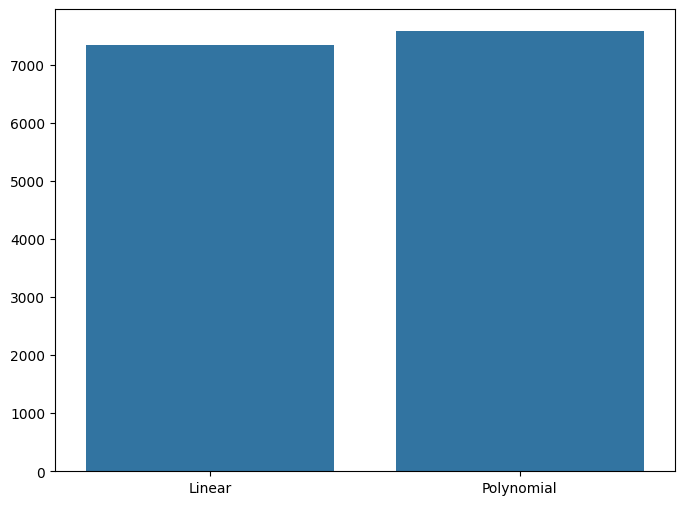

In [63]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))

mses = [7329.39, 7573.59]
sns.barplot(x = list(reg_models.keys()) , y = mses)